In [2]:
# Install libraries if needed (uncomment if running locally)
# !pip install nltk scikit-learn matplotlib

import nltk
from nltk.corpus import movie_reviews
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import random
import numpy as np


In [3]:
# Download the movie review dataset
nltk.download('movie_reviews')

# Load file IDs and shuffle
fileids = movie_reviews.fileids()
random.shuffle(fileids)

# Select exactly 300 reviews (150 pos, 150 neg if possible)
selected_ids = fileids[:300]

texts = [movie_reviews.raw(fid) for fid in selected_ids]
labels = [movie_reviews.categories(fid)[0] for fid in selected_ids]

print("Total dataset size:", len(texts))


Total dataset size: 300


[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    texts, labels, test_size=0.2, random_state=42, stratify=labels
)

print("Training size:", len(X_train))
print("Test size:", len(X_test))


Training size: 240
Test size: 60


In [5]:
positive_words = ["good", "great", "excellent", "amazing", "love"]
negative_words = ["bad", "terrible", "awful", "boring", "hate"]

def baseline_predict(text):
    t = text.lower()
    pos = sum(word in t for word in positive_words)
    neg = sum(word in t for word in negative_words)
    return "pos" if pos >= neg else "neg"

baseline_predictions = [baseline_predict(t) for t in X_test]
baseline_acc = accuracy_score(y_test, baseline_predictions)

print("Baseline Accuracy:", baseline_acc)
print("\nClassification Report:\n")
print(classification_report(y_test, baseline_predictions))


Baseline Accuracy: 0.5333333333333333

Classification Report:

              precision    recall  f1-score   support

         neg       0.78      0.21      0.33        33
         pos       0.49      0.93      0.64        27

    accuracy                           0.53        60
   macro avg       0.63      0.57      0.49        60
weighted avg       0.65      0.53      0.47        60



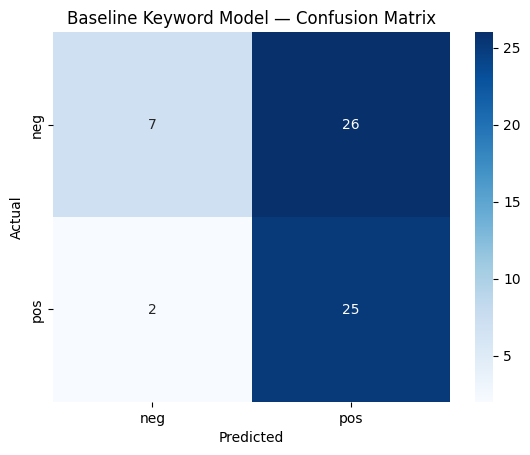

In [6]:
cm = confusion_matrix(y_test, baseline_predictions)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["neg", "pos"], yticklabels=["neg", "pos"])
plt.title("Baseline Keyword Model — Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [7]:
nb_pipeline = Pipeline([
    ("vectorizer", CountVectorizer(stop_words='english')),
    ("nb", MultinomialNB())
])

nb_pipeline.fit(X_train, y_train)

pipeline_predictions = nb_pipeline.predict(X_test)

pipeline_acc = accuracy_score(y_test, pipeline_predictions)
print("Naive Bayes Pipeline Accuracy:", pipeline_acc)

print("\nClassification Report:\n")
print(classification_report(y_test, pipeline_predictions))


Naive Bayes Pipeline Accuracy: 0.7166666666666667

Classification Report:

              precision    recall  f1-score   support

         neg       0.79      0.67      0.72        33
         pos       0.66      0.78      0.71        27

    accuracy                           0.72        60
   macro avg       0.72      0.72      0.72        60
weighted avg       0.73      0.72      0.72        60



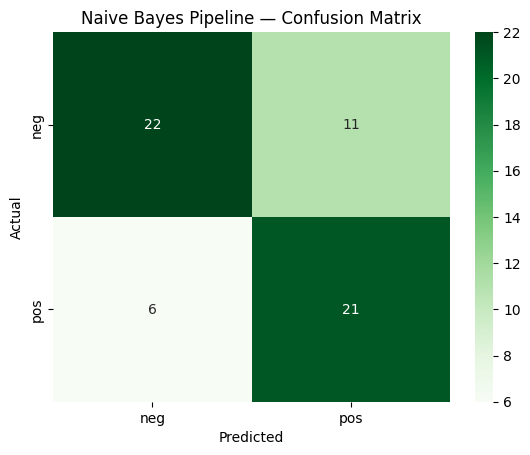

In [8]:
cm = confusion_matrix(y_test, pipeline_predictions)
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens",
            xticklabels=["neg", "pos"], yticklabels=["neg", "pos"])
plt.title("Naive Bayes Pipeline — Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


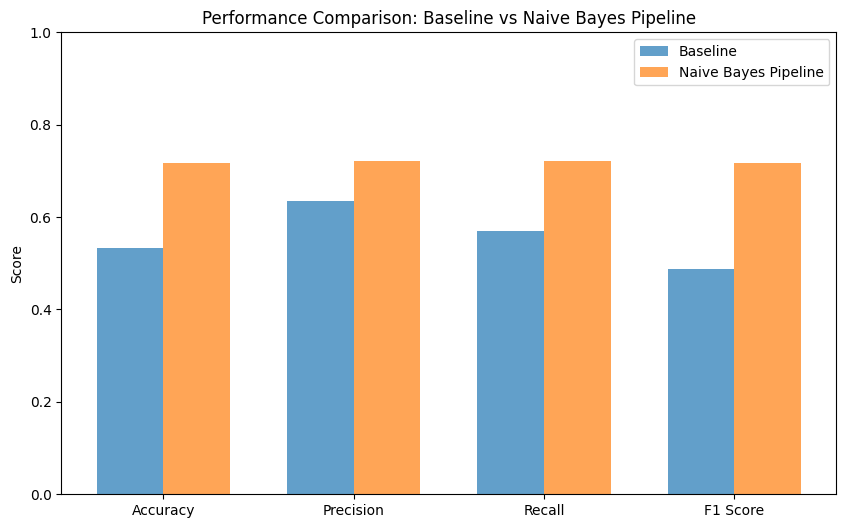

In [11]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Convert predictions to match same label order
labels_order = ["neg", "pos"]

# Baseline metrics
baseline_precision = precision_score(y_test, baseline_predictions, average="macro", zero_division=0)
baseline_recall = recall_score(y_test, baseline_predictions, average="macro")
baseline_f1 = f1_score(y_test, baseline_predictions, average="macro")

# Pipeline metrics
pipeline_precision = precision_score(y_test, pipeline_predictions, average="macro")
pipeline_recall = recall_score(y_test, pipeline_predictions, average="macro")
pipeline_f1 = f1_score(y_test, pipeline_predictions, average="macro")

# Prepare data for graph
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]
baseline_scores = [baseline_acc, baseline_precision, baseline_recall, baseline_f1]
pipeline_scores = [pipeline_acc, pipeline_precision, pipeline_recall, pipeline_f1]

x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, baseline_scores, width, label='Baseline', alpha=0.7)
plt.bar(x + width/2, pipeline_scores, width, label='Naive Bayes Pipeline', alpha=0.7)

plt.xticks(x, metrics)
plt.ylim(0, 1)
plt.ylabel("Score")
plt.title("Performance Comparison: Baseline vs Naive Bayes Pipeline")
plt.legend()
plt.show()



In [12]:
examples = [
    # 1 
    "The movie started slow and felt boring at first, but overall it turned out to be surprisingly good and enjoyable.",
    
    # 2 
    "This film was absolutely terrible. The acting was awful and I hated every minute.",
    
    # 3 
    "It's not the worst movie ever made, but I wouldn't call it good either. Some parts worked, others didn't."
]

print("\n=== EXAMPLE EVALUATIONS ===\n")
for i, text in enumerate(examples, start=1):
    base = baseline_predict(text)
    pipe = nb_pipeline.predict([text])[0]
    print(f"Example {i}:")
    print("Review:", text)
    print("Baseline Prediction:", base)
    print("Pipeline Prediction:", pipe)
    print("-" * 60)



=== EXAMPLE EVALUATIONS ===

Example 1:
Review: The movie started slow and felt boring at first, but overall it turned out to be surprisingly good and enjoyable.
Baseline Prediction: pos
Pipeline Prediction: pos
------------------------------------------------------------
Example 2:
Review: This film was absolutely terrible. The acting was awful and I hated every minute.
Baseline Prediction: neg
Pipeline Prediction: neg
------------------------------------------------------------
Example 3:
Review: It's not the worst movie ever made, but I wouldn't call it good either. Some parts worked, others didn't.
Baseline Prediction: pos
Pipeline Prediction: neg
------------------------------------------------------------
